<a href="https://colab.research.google.com/github/ananddiv/datascience/blob/main/bk_remake_of_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Matplotlib Overview

### Import libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


### Load dataset and take a 10% sample

In [6]:
df = sns.load_dataset('diamonds')

In [8]:
df.shape

(53940, 10)

In [9]:
# the shape of the data shows that the population is huge  rows so we will cutdown the sample size to 10%
df = df.sample(frac = .1, random_state = 33)

In [10]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
47741,0.70,Premium,F,SI2,62.0,58.0,1890,5.70,5.64,3.52
46368,0.54,Premium,G,VS1,61.1,60.0,1760,5.28,5.23,3.21
35288,0.30,Very Good,H,VS2,60.9,61.0,473,4.32,4.35,2.64
44106,0.60,Very Good,H,VS2,60.8,60.0,1557,5.39,5.44,3.29
31088,0.33,Very Good,G,VVS2,60.0,63.0,752,4.45,4.49,2.68


In [ ]:
df.shape

(5394, 10)

### Simple histogram

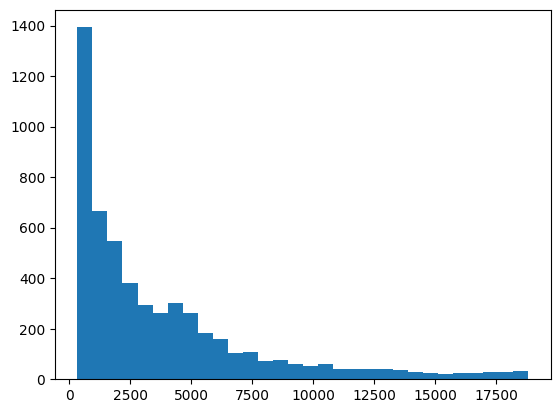

In [ ]:
plt.hist(df['price'], bins = 30)
plt.show()

### Two histograms over top of each other

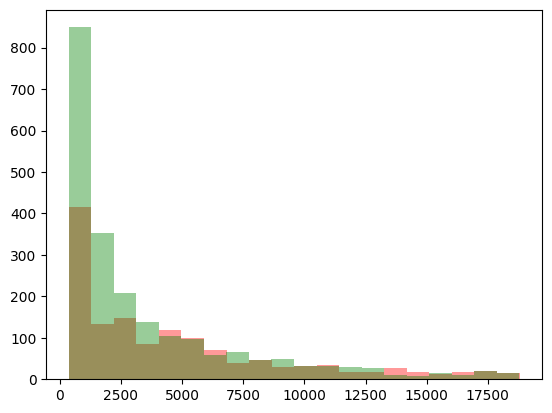

In [ ]:
plt.hist(df.query('cut == "Premium"')['price'], bins = 20, alpha = .4, color = 'red')
plt.hist(df.query('cut == "Ideal"')['price'], bins = 20, alpha = .4, color = 'green')
plt.show()

### Two ways to do scatter plot

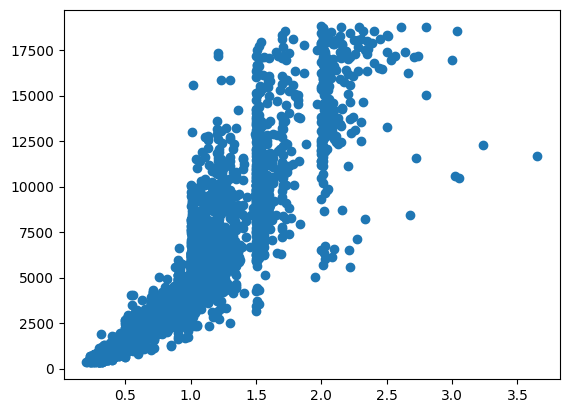

In [ ]:
plt.scatter(df['carat'], df['price'])


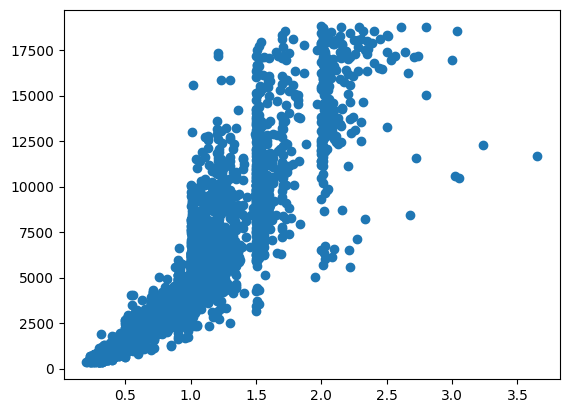

In [ ]:
plt.scatter('carat', 'price', data = df)

#### Let's change the markers and the colors

This is a silly example below just to show a couple different options of markers and color

In [ ]:
sample = df.sample(n = 200)


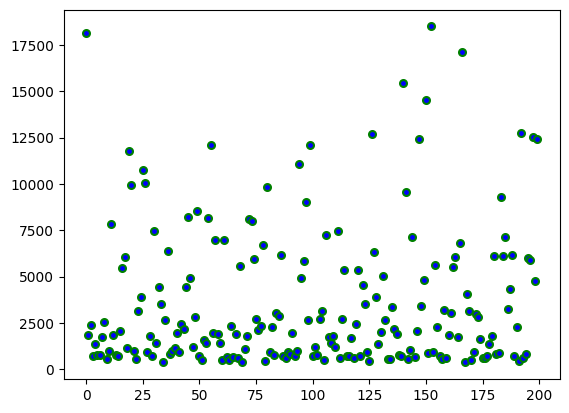

In [ ]:
# plt.scatter(x = range(len(sample)),y = sample['price'], color = 'blue',marker = 's')
plt.scatter(x = range(len(sample)),y = sample['price'], color = 'blue',marker = '.', edgecolors = 'green', linewidths = 1.5, s= 100)

In [ ]:
cut = df.groupby('cut', as_index = False).agg( avg_price =('price', np.mean)).sort_values('avg_price')
cut

,cut,avg_price
0,Ideal,3527.939492
2,Very Good,3870.273624
3,Good,4033.483940
4,Fair,4066.932886
1,Premium,4693.052292


<BarContainer object of 5 artists>

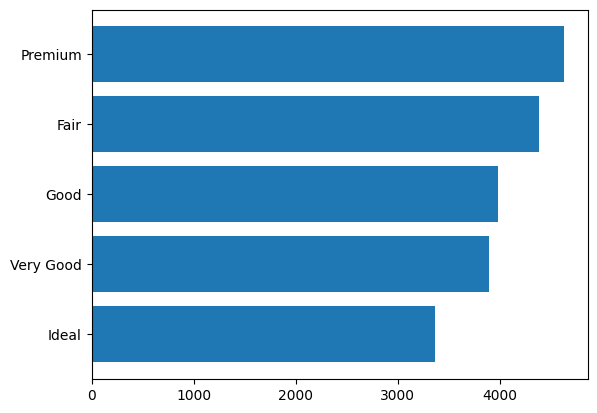

In [ ]:
plt.barh(y = cut['cut'], width = cut['avg_price'])

Let's put some labels to this plot

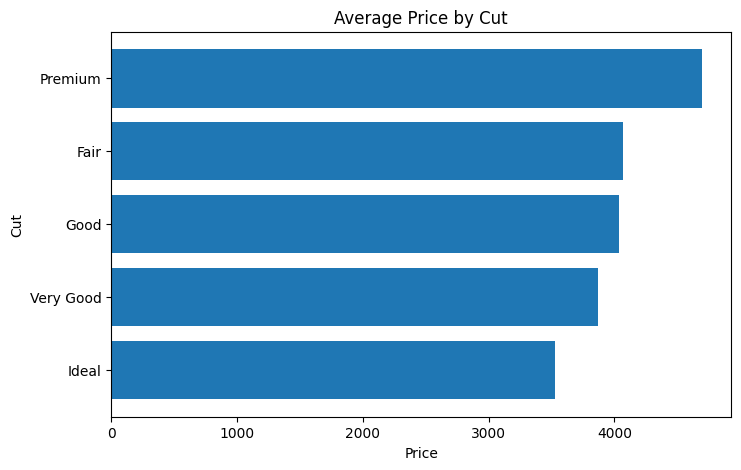

In [ ]:



plt.figure(figsize = (8,5))
plt.xlabel('Price')
plt.ylabel('Cut')
plt.title("Average Price by Cut")

plt.barh(y = cut['cut'], width = cut['avg_price'])
plt.show()

Now let's change the tick marks, put some grid lines, and save the file.

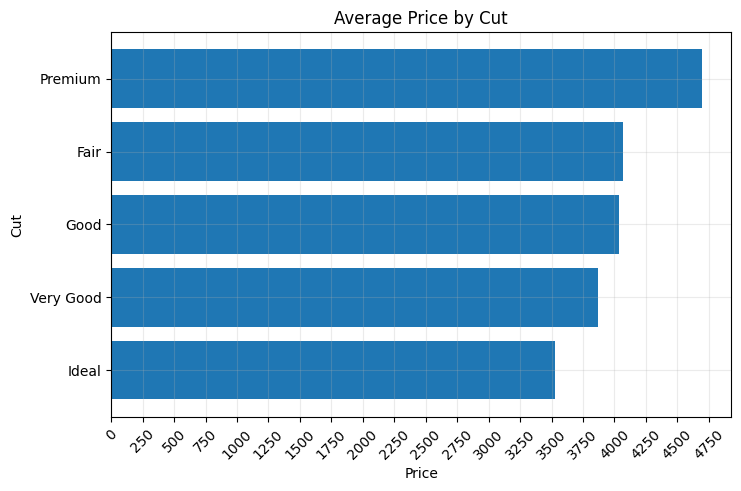

In [ ]:
plt.figure(figsize = (8,5))
plt.xlabel('Price')
plt.ylabel('Cut')
plt.title("Average Price by Cut")
plt.barh(y = cut['cut'], width = cut['avg_price'])
plt.xticks( np.arange(0,5000,250), rotation = 45)
plt.grid(alpha = .25)
plt.savefig('test.png')



Let's look at a simple boxplot.  Doing a multi-variable plot in matplotlib is rather annoying.  We will look at how to do that in seaborn.

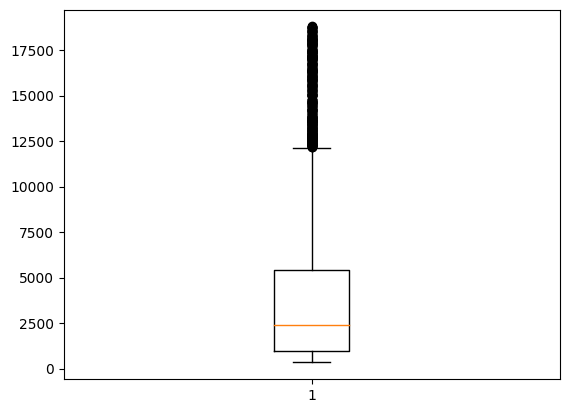

In [ ]:
plt.boxplot(x = 'price', data = df)
plt.show()